# Business Case: Delhivery - Feature Engineering


## About Delhivery


Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of
world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


## Business Problem

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their
competitors.
The company wants to understand and process the data coming out of data engineering pipelines:
• Clean, sanitize and manipulate data to get useful features out of raw fields
• Make sense out of the raw data and help the data science team to build forecasting models on it

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their
competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

* Clean, sanitize and manipulate data to get useful features out of raw fields
* Make sense out of the raw data and help the data science team to build forecasting models on it

## Problem statement

* Study the data set for data cleaning and preprocessing
* Detect outliers in the data set using describe function and boxplot
* Understand the distribution of data for the quantitative attributes
* Understand correlations of data among the quantitative attributes
* Which rutetype use more time to deliver
* Rute type preffered for the product delevery
* which destination state has most delivery
* which source state has most delivery
* No_of delevery across month
* Weekday & Month with most delivery of the products
* Which dest_city has most product deliverys in a state
* Source_city with most deliverys in a state
* Which state has more source center
* Which state has more destination center
* Top Indian states with most source and destination cities
* Relation between actual time and estimated time for the completion of product delivery
* Relation between actual distance and estimated distance for product delivery
* Relation between actual time and estimated time for product deliver from source to destination
* Relation between actual time and estimated time for diffrent route types
* Relation between actual distance and estimated distance for diffrent route types

 *Feature engineering*
  * Calculate the time taken between od_start_time and od_end_time as time_difference

 *Hypothesis*
  * Compare the difference between time_difference and start_scan_to_end_scan.
  * Actual_time aggregated value and OSRM time aggregated value
  * Actual_time aggregated value and segment actual time aggregated value
  * Osrm distance aggregated value and segment osrm distance aggregated value
  * Osrm time aggregated value and segment osrm time aggregated value
* Find outliers in the numerical variables and check it using visual analysis
* One-hot encoding of categorical variables
* Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [1]:
# Importing libraries -

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset -
df=pd.read_csv('delhivery_data.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [3]:
# Shape of the dataset -
df.shape

(144867, 24)

In [4]:
#First 5 rows of data
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
# last five rows of data
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
#checking datatypes
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

We have to Change the data types of - trip_creation_time, od_start_time, od_end_time, cutoff_timestamp

In [8]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [10]:
df.shape


(144867, 24)

In [11]:
# Number of unique values in each column
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [12]:
# checking duplicates
df.duplicated().sum()

0

In [13]:
# Checking Missing Values in the dataset
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

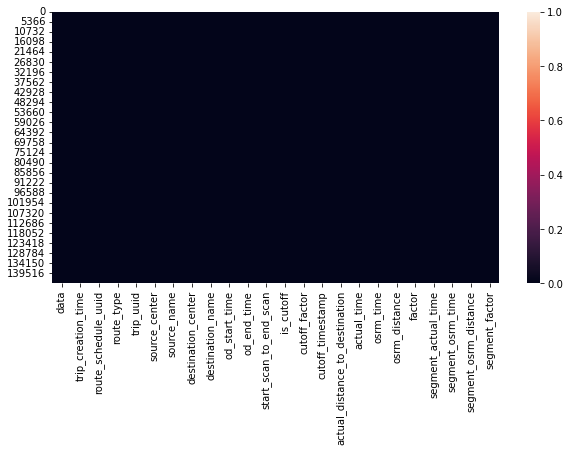

source_name's null rate :0.2%
destination_name's null rate :0.18%


In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

### Handling missing values

In [15]:
# Removing  the null values
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [17]:
# Grouping by sub-journey in the trip
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
     df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
    
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [18]:
# Aggregating at sub-jouney lebel

create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    
}

In [19]:
# Grouping mini-trips, sorting by time

df1 = df.groupby('segment_key').agg(create_segment_dict).reset_index()
df1 = df1.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [20]:
df1

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [21]:
df1.nunique()

index                             26222
segment_key                       26222
data                                  2
trip_creation_time                14787
route_schedule_uuid                1497
route_type                            2
trip_uuid                         14787
source_center                      1496
source_name                        1496
destination_center                 1466
destination_name                   1466
od_start_time                     26222
od_end_time                       26222
start_scan_to_end_scan             1914
actual_distance_to_destination    26193
actual_time                        1657
osrm_time                           560
osrm_distance                     25871
segment_actual_time_sum            1676
segment_osrm_distance_sum         25948
segment_osrm_time_sum              1102
dtype: int64

**Calculate time taken between od_start_time and od_end_time and keep it as a feature**

* od_time_diff_hour is matching with start_scan_to_end_time

In [22]:
df1['od_time_diff_hour'] = (df1['od_end_time'] - df1['od_start_time']).dt.total_seconds() /(60)
df1['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [23]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum', 
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    
}

In [24]:
df2 = df1.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
df2.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0


### Hypothesis Testing --> Recommendation to the business

In [25]:
df2['destination_name'] = df2['destination_name'].str.lower() # lowering all columns
df2['source_name'] = df2['source_name'].str.lower()

In [26]:
def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]
    
    return state[:-1] #removing ')' from ending

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]
    
    city = city.split('_')[0]
    
    # Now daling with edge cases
          
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar':
        return 'bhopal'
    if city == 'mumbai antop hill':
        return 'mumbai'

    return city

def place2city_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]

In [27]:
df2['destination_state'] = df2['destination_name'].apply(lambda x: place2state(x))
df2['destination_city']  = df2['destination_name'].apply(lambda x: place2city(x))
df2['destination_place'] = df2['destination_name'].apply(lambda x: place2city_place(x))

In [28]:
df2[['destination_state','destination_city','destination_place']]

,destination_state,destination_city,destination_place
0,uttar pradesh,kanpur,central
1,karnataka,doddablpur,chikadpp
2,haryana,gurgaon,bilaspur
3,maharashtra,mumbai,mirard
4,karnataka,sandur,wrdn1dpp
...,...,...,...
14782,punjab,chandigarh,mehmdpur
14783,haryana,faridabad,blbgarh
14784,uttar pradesh,kanpur,govndngr
14785,tamil nadu,tirchchndr,shnmgprm


In [29]:
df2['source_state'] = df2['source_name'].apply(lambda x: place2state(x))
df2['source_city']  = df2['source_name'].apply(lambda x: place2city(x))
df2['source_place'] = df2['source_name'].apply(lambda x: place2city_place(x))

In [30]:
df2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,destination_place,source_state,source_city,source_place
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,991.3523,1548.0,1320.4733,1008.0,uttar pradesh,kanpur,central,uttar pradesh,kanpur,central
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,karnataka,doddablpur,chikadpp
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,2354.0665,3308.0,2545.2678,1941.0,haryana,gurgaon,bilaspur,haryana,gurgaon,bilaspur
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,maharashtra,mumbai hub,mumbai
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,146.7918,340.0,146.7919,115.0,karnataka,sandur,wrdn1dpp,karnataka,bellary,bellary


In [31]:
df2['trip_year'] = df2['trip_creation_time'].dt.year
df2['trip_month'] = df2['trip_creation_time'].dt.month
df2['trip_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_dayofweek'] = df2['trip_creation_time'].dt.strftime("%A")

In [32]:
df2[['trip_year','trip_month','trip_hour','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_dayofweek
0,2018,9,0,Wednesday
1,2018,9,0,Wednesday
2,2018,9,0,Wednesday
3,2018,9,0,Wednesday
4,2018,9,0,Wednesday
...,...,...,...,...
14782,2018,10,23,Wednesday
14783,2018,10,23,Wednesday
14784,2018,10,23,Wednesday
14785,2018,10,23,Wednesday


In [33]:
df2.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_year,trip_month,trip_hour,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,uttar pradesh,kanpur,central,2018,9,0,Wednesday
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,karnataka,doddablpur,chikadpp,2018,9,0,Wednesday


### Find outliers in numericals variable, and visualize it using visual analysis

In [34]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

<AxesSubplot:>

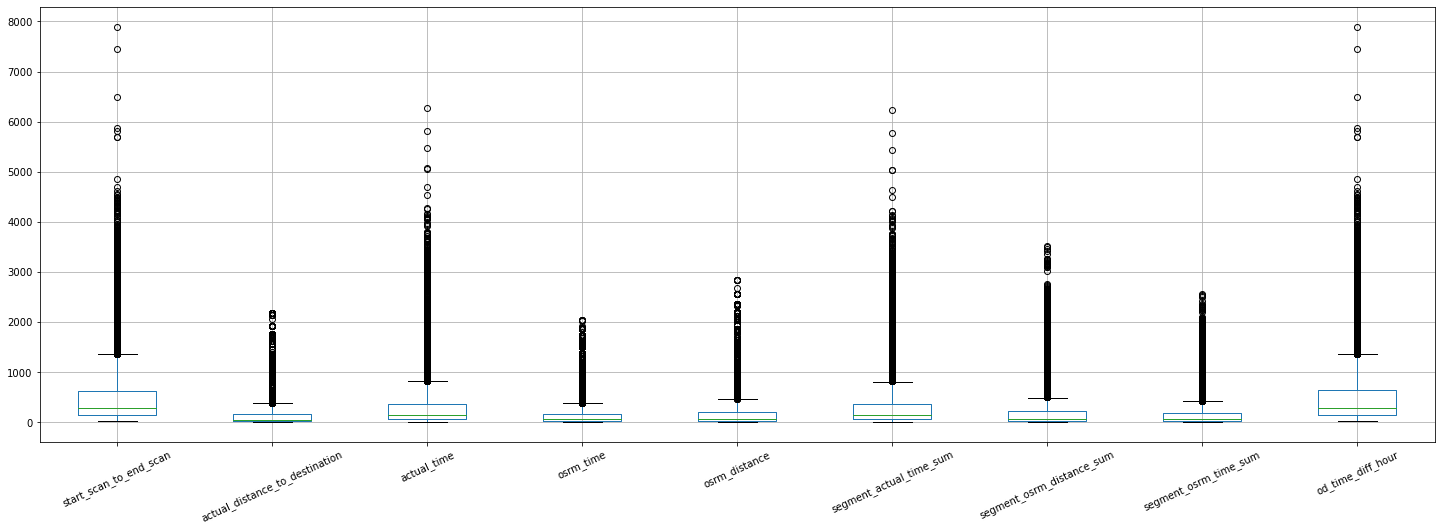

In [35]:
df2[num_cols].boxplot(rot=25, figsize=(25,8))

In [36]:
# Handle the outliers using IQR method

Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [37]:
df2 = df2[-((df2[num_cols] < (Q1 - 1.5 * IQR)) | (df2[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df2 = df2.reset_index(drop=True) 

<AxesSubplot:>

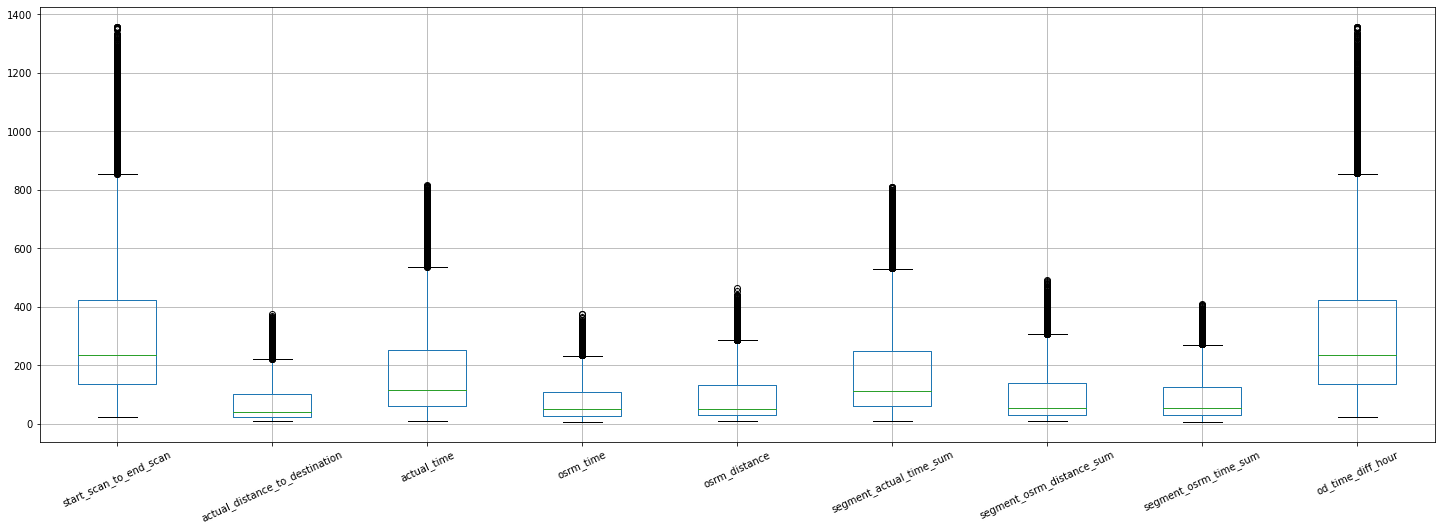

In [38]:
df2[num_cols].boxplot(rot=25, figsize=(25,8))

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12723 entries, 0 to 12722
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            12723 non-null  object        
 1   trip_creation_time              12723 non-null  datetime64[ns]
 2   route_schedule_uuid             12723 non-null  object        
 3   route_type                      12723 non-null  object        
 4   trip_uuid                       12723 non-null  object        
 5   source_center                   12723 non-null  object        
 6   source_name                     12723 non-null  object        
 7   destination_center              12723 non-null  object        
 8   destination_name                12723 non-null  object        
 9   start_scan_to_end_scan          12723 non-null  float64       
 10  od_time_diff_hour               12723 non-null  float64       
 11  ac

In [40]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,12723.0,320.178731,255.555831,23.000000,136.000000,233.000000,423.000000,1355.000000
od_time_diff_hour,12723.0,321.022701,255.885432,23.461468,136.523359,233.549105,423.905113,1357.397291
actual_distance_to_destination,12723.0,72.317812,72.070232,9.002461,21.395561,38.525319,101.673567,373.441224
actual_time,12723.0,177.452723,158.150841,9.000000,61.000000,114.000000,251.000000,815.000000
osrm_time,12723.0,78.440305,72.333674,6.000000,27.000000,50.000000,109.000000,376.000000
osrm_distance,12723.0,91.734030,89.566572,9.072900,28.344450,48.418300,131.316850,463.478100
segment_actual_time_sum,12723.0,175.796274,157.099770,9.000000,60.000000,113.000000,248.000000,810.000000
segment_osrm_distance_sum,12723.0,97.971558,94.819043,9.072900,29.437950,54.090300,140.529400,489.571600
segment_osrm_time_sum,12723.0,85.908355,79.604978,6.000000,28.000000,53.000000,125.000000,408.000000
trip_year,12723.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [41]:
df2.describe(include='object').T

,count,unique,top,freq
data,12723,2,training,9097
route_schedule_uuid,12723,1360,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,12723,2,Carting,8812
trip_uuid,12723,12723,trip-153671042288605164,1
source_center,12723,902,IND000000ACB,669
source_name,12723,902,gurgaon_bilaspur_hb (haryana),669
destination_center,12723,1002,IND000000ACB,554
destination_name,12723,1002,gurgaon_bilaspur_hb (haryana),554
destination_state,12723,31,maharashtra,2285
destination_city,12723,810,bengaluru,1206


## Data Visualization

### Distribution of trip data for the orders

In [42]:
df_data = df2.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data.head()

,data,trip_uuid,perc
0,test,3626,28.5
1,training,9097,71.5


[]

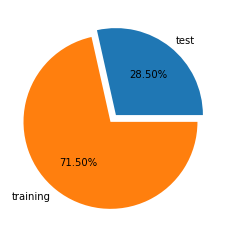

In [43]:
plt.pie(x = df_data['trip_uuid'], 
        labels = df_data['data'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()


### Distribution of route types for the orders

In [44]:
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,8812,69.26
1,FTL,3911,30.74


[]

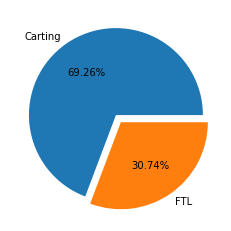

In [45]:
plt.pie(x = df_route['trip_uuid'], 
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [46]:
#Now we have to know how many trips are created on the hourly basis

df2['trip_hour'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [47]:
df_hour = df2.groupby(by = 'trip_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_hour,trip_uuid
0,0,899
1,1,637
2,2,607
3,3,574
4,4,554


[]

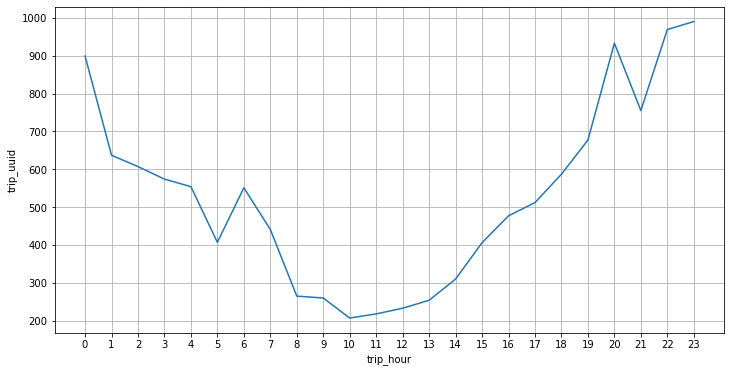

In [48]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour, 
             x = df_hour['trip_hour'], 
             y = df_hour['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

* It can be inferred from the above plot that the number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

In [49]:
#Now we have to know how many trips are created on the weekday basis

df2['trip_dayofweek'].value_counts(normalize=True)*100

Wednesday    18.486206
Saturday     14.430559
Thursday     14.296943
Friday       13.943252
Tuesday      13.880374
Monday       13.338049
Sunday       11.624617
Name: trip_dayofweek, dtype: float64

In [50]:
df_day = df2.groupby(by = 'trip_dayofweek')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_dayofweek,trip_uuid
0,Friday,1774
1,Monday,1697
2,Saturday,1836
3,Sunday,1479
4,Thursday,1819


[]

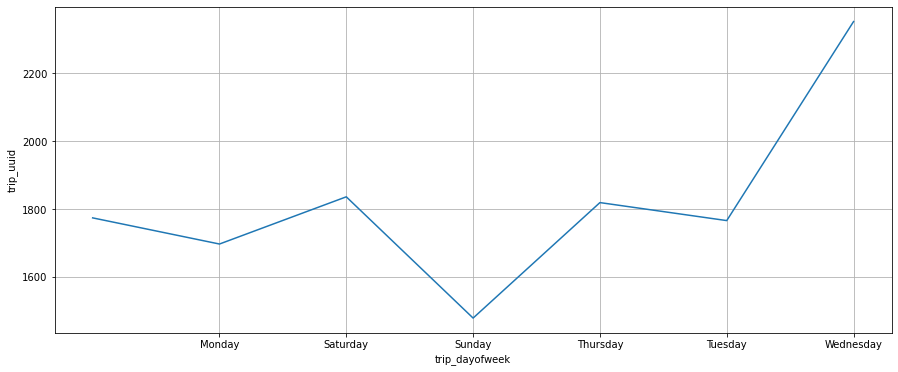

In [51]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day, 
             x = df_day['trip_dayofweek'], 
             y = df_day['trip_uuid'], 
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.plot()

* It can be inferred from the above plot that, most no of trips are created on *Wednesday* and least no of trips are on *Sunday*

In [52]:
# Now we have to know how meny trips are created basis of given 2  months
df_month = df2.groupby(by = 'trip_month')['trip_uuid'].count().to_frame().reset_index()
df_month['perc'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month.head()

,trip_month,trip_uuid,perc
0,9,11172,87.81
1,10,1551,12.19


[]

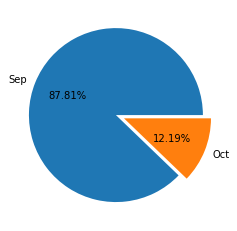

In [53]:
plt.pie(x = df_month['trip_uuid'], 
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.plot()

### Distribution of number of trips created from different states

In [54]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,maharashtra,2308,18.14
14,karnataka,2025,15.92
10,haryana,1365,10.73
23,tamil nadu,1032,8.11
24,telangana,701,5.51


[]

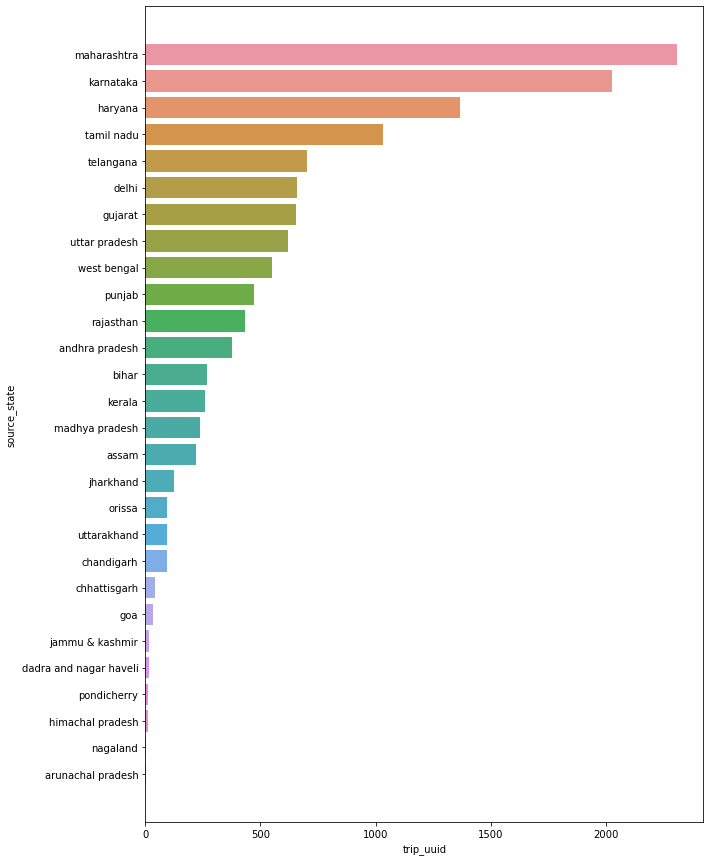

In [55]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'])
plt.plot()

* It can be seen in the above plot that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. That means that the seller base is strong in these states

### Top 30 cities based on the number of trips created from different cities

In [56]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city.head()

,source_city,trip_uuid,perc
76,bengaluru,1113,8.75
241,gurgaon,745,5.86
441,mumbai,666,5.23
55,bangalore,568,4.46
97,bhiwandi,540,4.24


[]

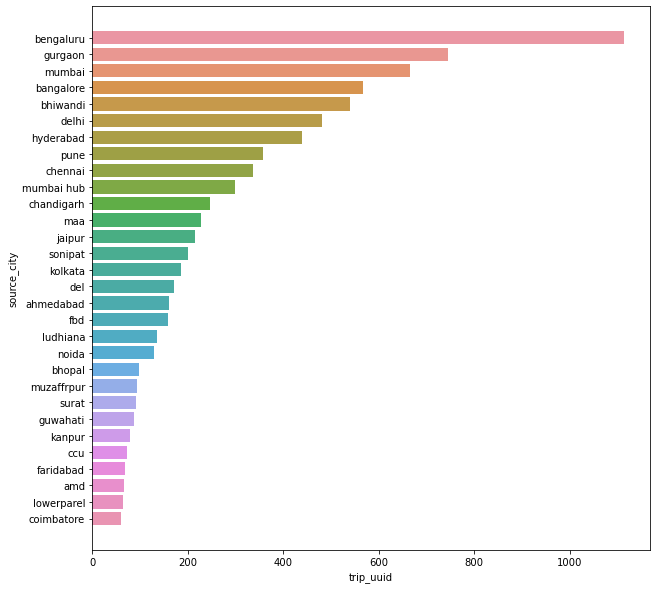

In [57]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city, 
            x = df_source_city['trip_uuid'], 
            y = df_source_city['source_city'])
plt.plot()

It can be seen in the above plot that maximum trips originated from Bengaluru city followed by Gurgaon Delhi, Mumbai and Bhiwandi. That means that the seller base is strong in these cities.

### distribution of number of trips which ended in different states

In [58]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

,destination_state,trip_uuid,perc
18,maharashtra,2285,17.96
15,karnataka,2070,16.27
11,haryana,1333,10.48
25,tamil nadu,1040,8.17
26,telangana,682,5.36


[]

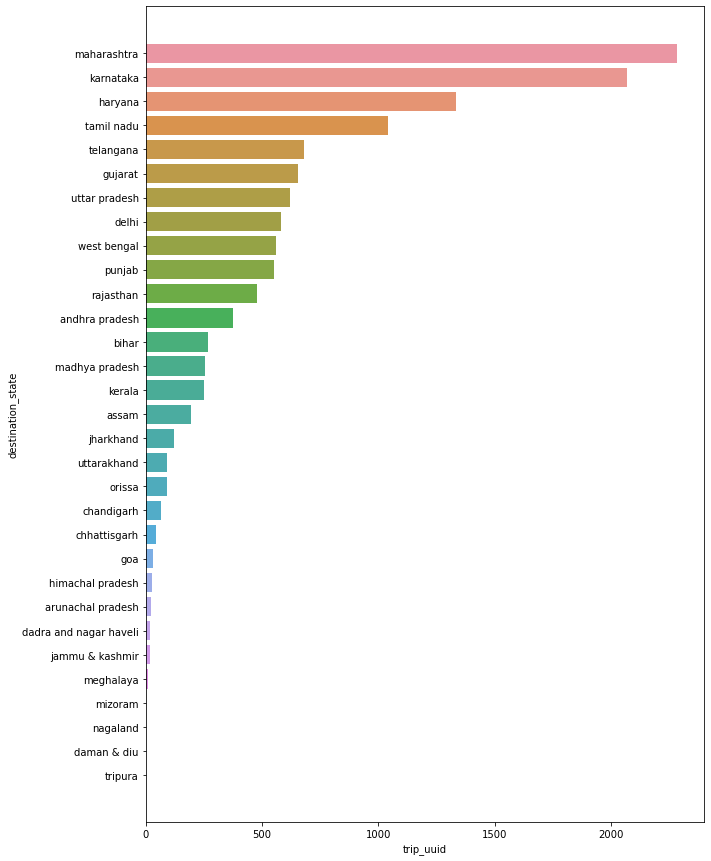

In [59]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state, 
            x = df_destination_state['trip_uuid'], 
            y = df_destination_state['destination_state'])
plt.plot()

It can be seen in the above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Telengana. That means that the number of orders placed in these states is significantly high in these states.

#### top 30 cities based on the number of trips ended in different cities

In [60]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city.head()

,destination_city,trip_uuid,perc
96,bengaluru,1206,9.48
521,mumbai,966,7.59
281,gurgaon,610,4.79
200,delhi,476,3.74
309,hyderabad,411,3.23


[]

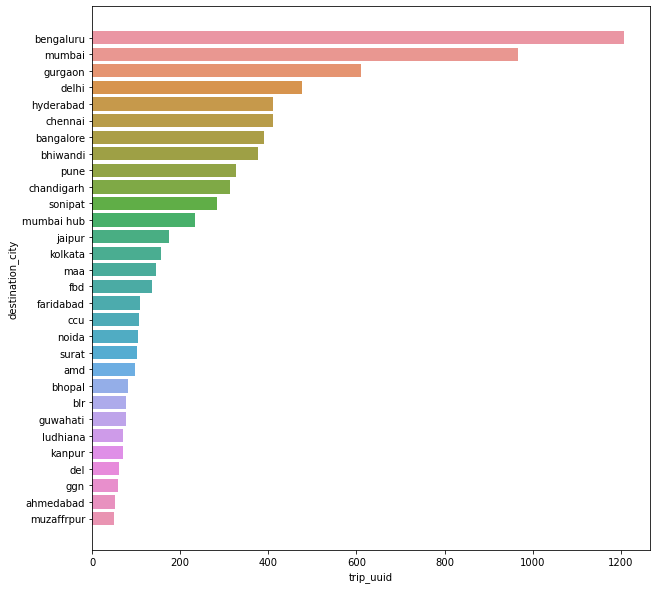

In [61]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city, 
            x = df_destination_city['trip_uuid'], 
            y = df_destination_city['destination_city'])
plt.plot()

* It can be seen in the above plot that maximum trips ended in Bengaluru city followed by Mumbai, Gurgaon, Delhi and Hyderabad. 

* That means that the number of orders placed in these cities is significantly high.

[]

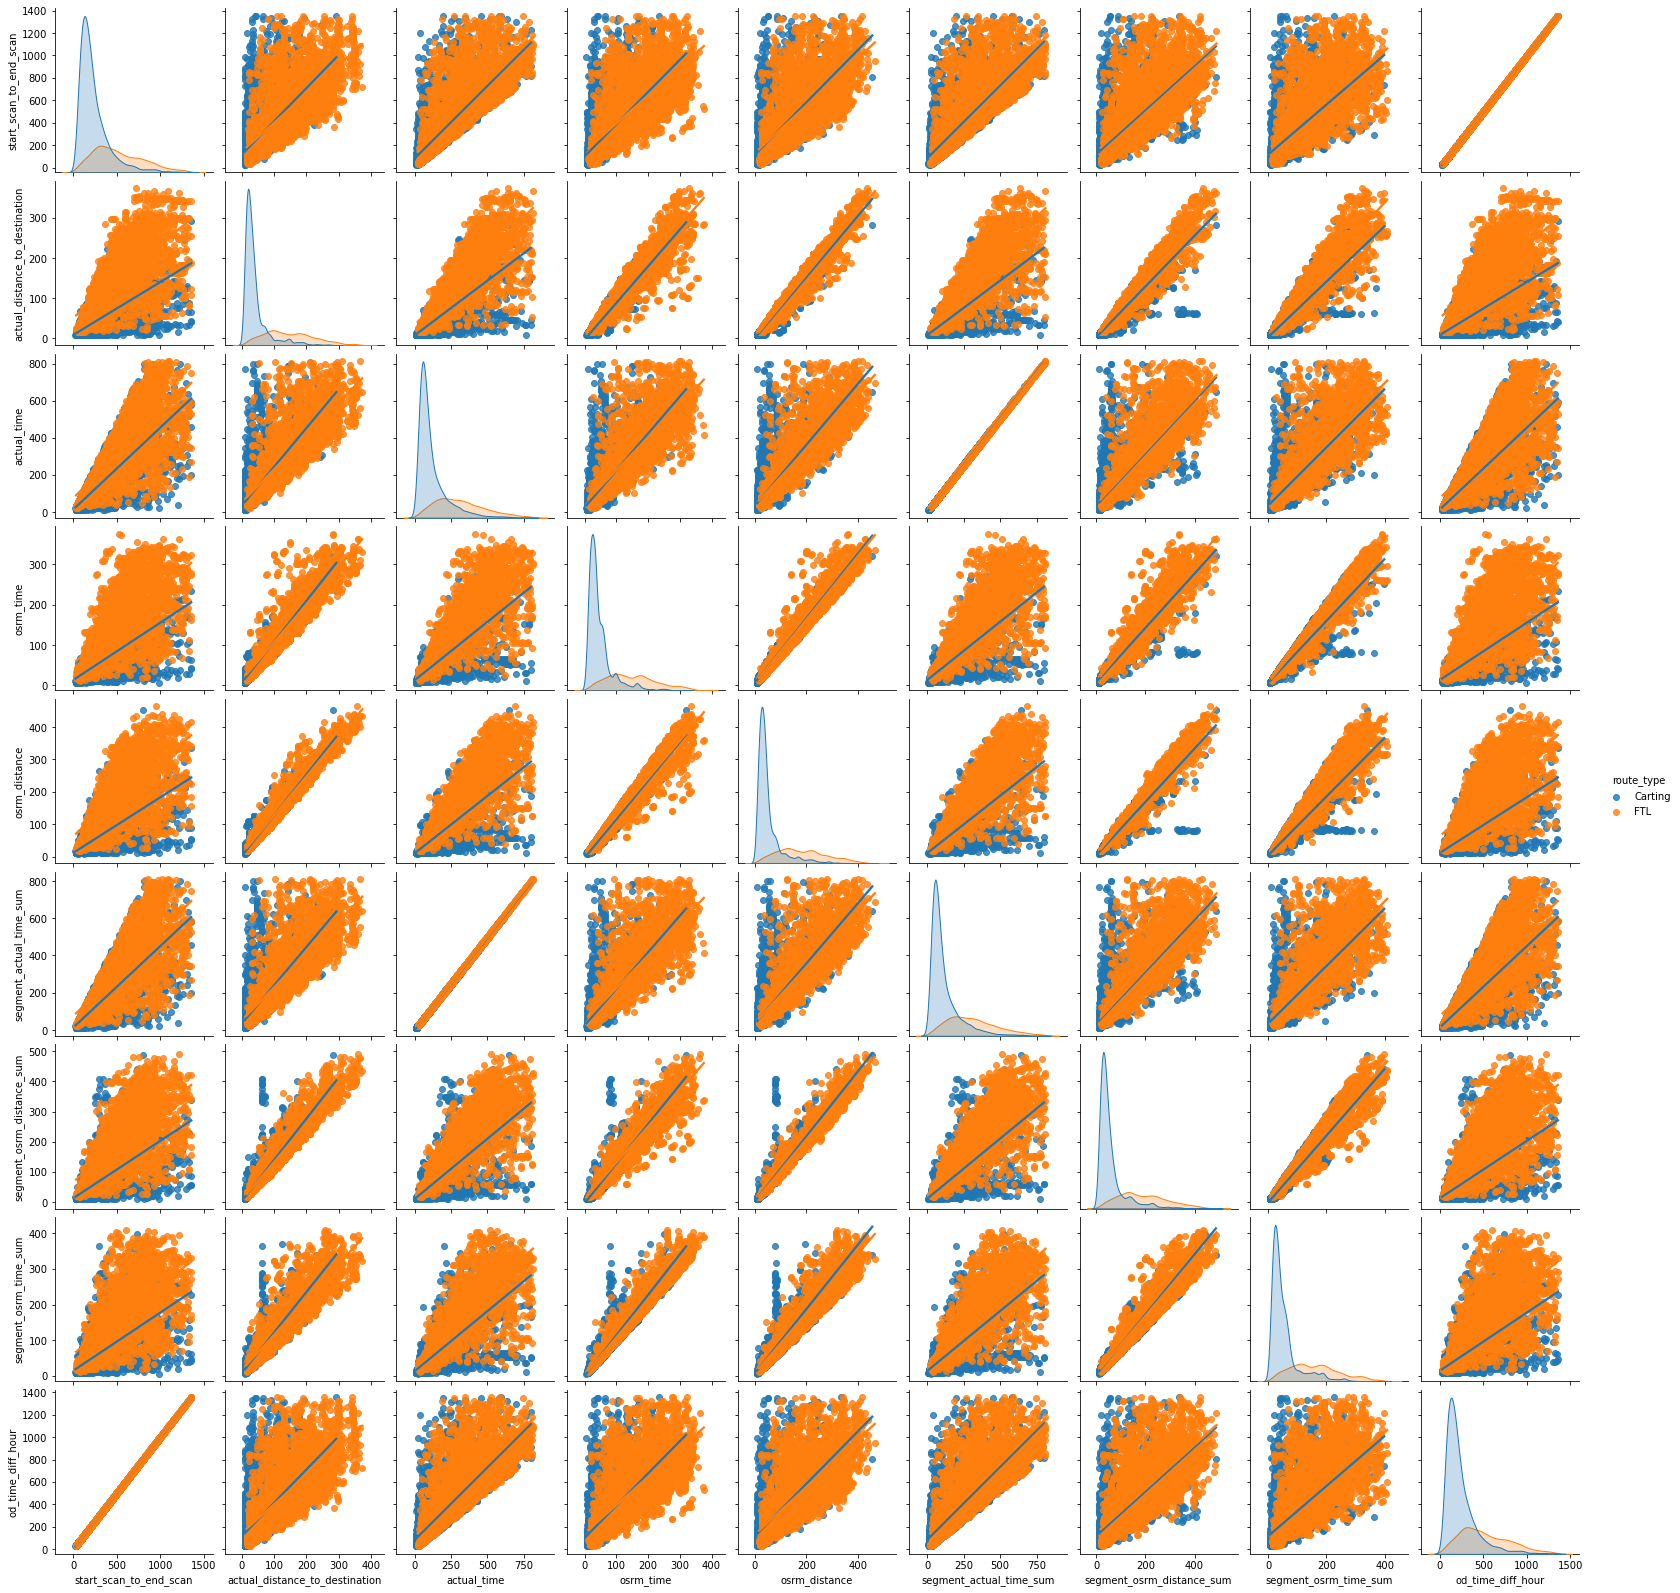

In [62]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']
sns.pairplot(data = df2,
              vars =num_cols,
              kind = 'reg',
              hue = 'route_type')
plt.plot()

In [63]:
df_corr = df2[num_cols].corr()
df_corr

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
start_scan_to_end_scan,1.000000,0.758806,0.829412,0.762160,0.769070,0.829082,0.756317,0.740381,0.999997
actual_distance_to_destination,0.758806,1.000000,0.855702,0.963008,0.985860,0.853573,0.967066,0.933503,0.759265
actual_time,0.829412,0.855702,1.000000,0.859517,0.871387,0.999961,0.864839,0.845283,0.829717
osrm_time,0.762160,0.963008,0.859517,1.000000,0.981764,0.857608,0.963105,0.972867,0.762698
osrm_distance,0.769070,0.985860,0.871387,0.981764,1.000000,0.869452,0.979466,0.954882,0.769544
segment_actual_time_sum,0.829082,0.853573,0.999961,0.857608,0.869452,1.000000,0.862781,0.843283,0.829384
segment_osrm_distance_sum,0.756317,0.967066,0.864839,0.963105,0.979466,0.862781,1.000000,0.973413,0.756746
segment_osrm_time_sum,0.740381,0.933503,0.845283,0.972867,0.954882,0.843283,0.973413,1.000000,0.740857
od_time_diff_hour,0.999997,0.759265,0.829717,0.762698,0.769544,0.829384,0.756746,0.740857,1.000000


[]

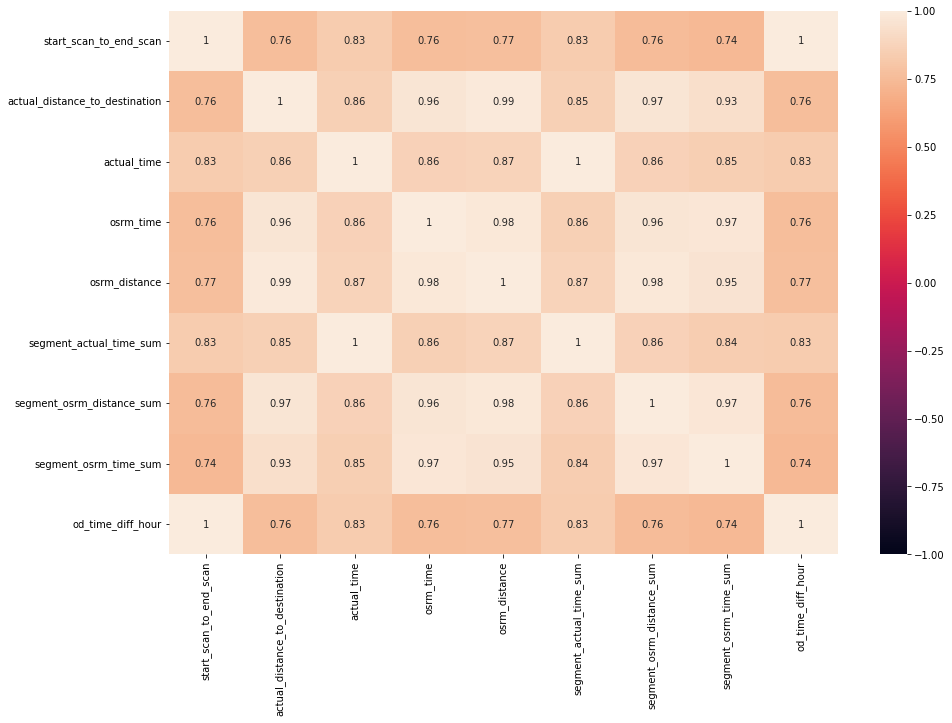

In [64]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

Very High Correlation (> 0.9) exists between columns all the numerical columns specified above

### In-depth analysis and feature engineering:

In [65]:
df2[['od_time_diff_hour','start_scan_to_end_scan']].describe()

,od_time_diff_hour,start_scan_to_end_scan
count,12723.000000,12723.000000
mean,321.022701,320.178731
std,255.885432,255.555831
min,23.461468,23.000000
25%,136.523359,136.000000
50%,233.549105,233.000000
75%,423.905113,423.000000
max,1357.397291,1355.000000


[]

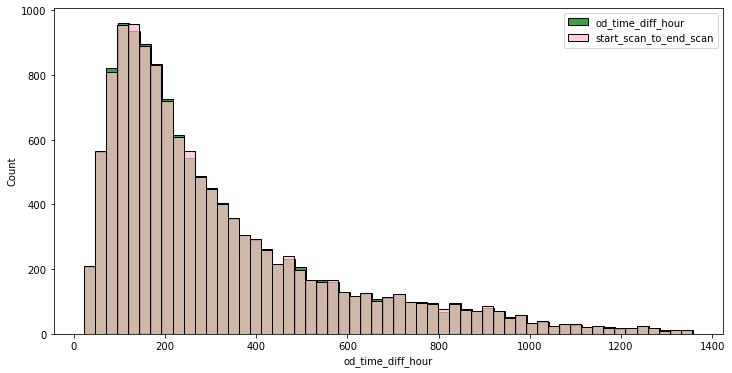

In [66]:
#Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (12, 6))
sns.histplot(df2['od_time_diff_hour'], color = 'green')
sns.histplot(df2['start_scan_to_end_scan'], color = 'pink')
plt.legend(['od_time_diff_hour', 'start_scan_to_end_scan'])
plt.plot()

**Distribution check using QQ Plot**

[]

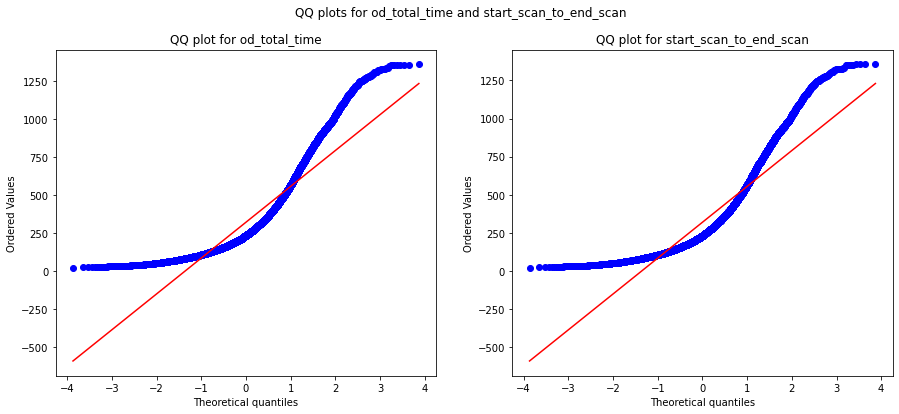

In [67]:
from scipy import stats

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
stats.probplot(df2['od_time_diff_hour'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
stats.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

**Applying Shapiro-Wilk test for normality**

H0 : The sample follows normal distribution

H1 : The sample does not follow normal distribution

alpha = 0.05


In [68]:
test_stat, p_value = stats.shapiro(df2['od_time_diff_hour'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [69]:
test_stat, p_value = stats.shapiro(df2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


* Transforming the data using boxcox transformation to check if the transformed data follows normal distribution

In [71]:
transformed_od_total_time = stats.boxcox(df2['od_time_diff_hour'])[0]
test_stat, p_value = stats.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.309223854593726e-26
The sample does not follow normal distribution


C:\Users\NANO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [72]:
transformed_start_scan_to_end_scan = stats.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = stats.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.333097043339973e-26
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.

#### Homogeneity of Variances using **Lavene's test**

In [74]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stats.levene(df2['od_time_diff_hour'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9146844256627764
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., **Mann-Whitney U rank test** for two independent samples.

In [76]:
test_stat, p_value = stats.mannwhitneyu(df2['od_time_diff_hour'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7366629968419203


Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

### Business Insights

* The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

* There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.

* Most of the data is for testing than for training.

* Most common route type is Carting.

* The names of 14 unique location ids are missing in the data.

* The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

* Maximum trips are created in the 38th week.

* Most orders come mid-month. That means customers usually make more orders in the mid of the month.

* Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

* Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

* Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

* Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

* Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

* Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.

## Recommendations

* The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

* osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

* The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

* Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

* Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

* From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.